Which factors contribute the most to diabetes risk among individuals?

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Datashet

In [24]:
url = 'https://raw.githubusercontent.com/ichleko91/Diabetes/refs/heads/main/diabetes_prediction_dataset.csv'

In [25]:
df = pd.read_csv(url)

Exploring and Cleaning the Data

In [26]:
df.shape

(100000, 9)

In [27]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Checking the entries in age and smoking history to see

In [29]:
for col in ['gender', 'smoking_history']:
    print(f"{col}: {df[col].unique()}")


gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


Droping "NaN" entries, "other" and "no info" from age and smoking history and making Male = 1 and Female = 2 to handle them as numbers

In [30]:
df = df[df['gender'] != 'Other']
df['gender'] = df['gender'].map({'Male': 1, 'Female': 2})



In [31]:
df['smoking_history'] = df['smoking_history'].str.strip().str.lower()
df = df[df['smoking_history'] != 'No Info']
df['smoking_history'] = df['smoking_history'].map({
    'never': 0,
    'ever': 0,
    'not current': 0,
    'current': 1,
    'former': 1
})
df = df.dropna(subset=['smoking_history'])

Print to see if all went well

In [32]:
print(df['gender'].unique())
print(df['smoking_history'].unique())

[2 1]
[0. 1.]


Entries Left

In [33]:
df.shape

(64172, 9)

Convert columns to integer type for easier handling

In [34]:
df['age'] = df['age'].astype(int)
df['smoking_history'] = df['smoking_history'].astype(int)
df['gender'] = df['gender'].astype(int)

checking if all values is as we want them and an overview of each column

In [35]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64172 non-null  int64  
 1   age                  64172 non-null  int64  
 2   hypertension         64172 non-null  int64  
 3   heart_disease        64172 non-null  int64  
 4   smoking_history      64172 non-null  int64  
 5   bmi                  64172 non-null  float64
 6   HbA1c_level          64172 non-null  float64
 7   blood_glucose_level  64172 non-null  int64  
 8   diabetes             64172 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 4.9 MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000
mean,1.605435,46.546001,0.097909,0.047045,0.290438,28.424262,5.564279,139.629792,0.109799
std,0.488761,19.542648,0.297194,0.211738,0.453968,6.515975,1.095535,42.166693,0.312641
min,1.000000,0.000000,0.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,1.000000,31.000000,0.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,2.000000,47.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2.000000,61.000000,0.000000,0.000000,1.000000,31.100000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


checking  how many entries of those left have diabetes and how many dont to see if the data are actually valuable

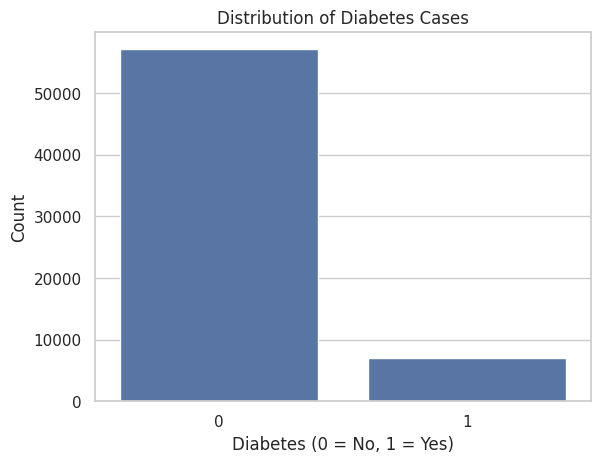

In [36]:
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


checking which variables have the strongest correlation with diabetes on a heatmap

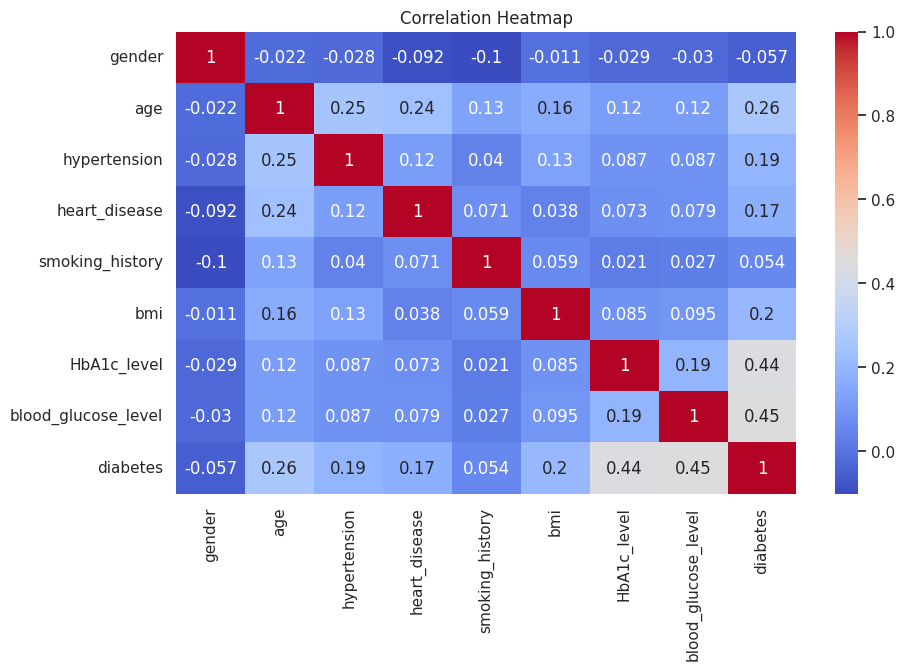

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Boxplots for Outlier Detection

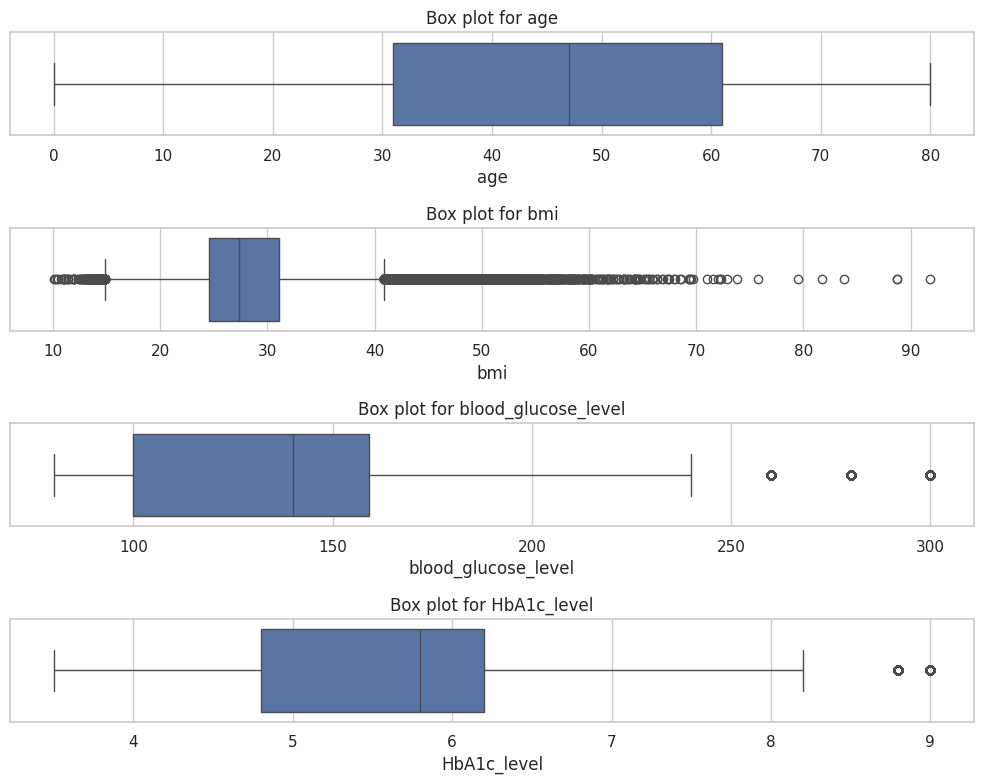

In [38]:
numeric_columns = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 2*len(numeric_columns)))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Box plot for {column}')
plt.tight_layout()
plt.show()

Vizualization of data :

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


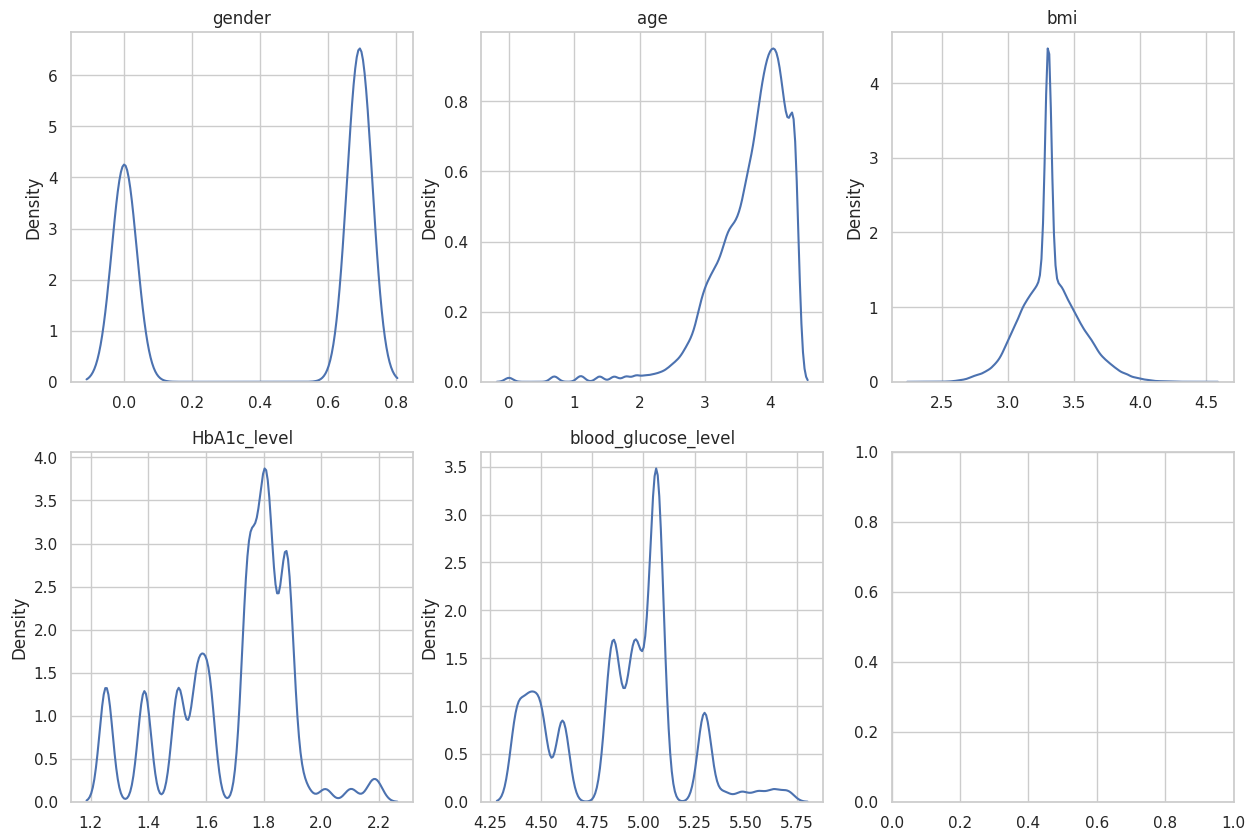

In [39]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.kdeplot(np.log(df['gender']),ax=axes[0,0]).set(xlabel='', title='gender')
sns.kdeplot(np.log(df['age']),ax=axes[0,1]).set(xlabel='', title='age')
sns.kdeplot(np.log(df['bmi']),ax=axes[0,2]).set(xlabel='', title='bmi')
sns.kdeplot(np.log(df['HbA1c_level']),ax=axes[1,0]).set(xlabel='', title='HbA1c_level')
sns.kdeplot(np.log(df['blood_glucose_level']),ax=axes[1,1]).set(xlabel='', title='blood_glucose_level')
plt.show()

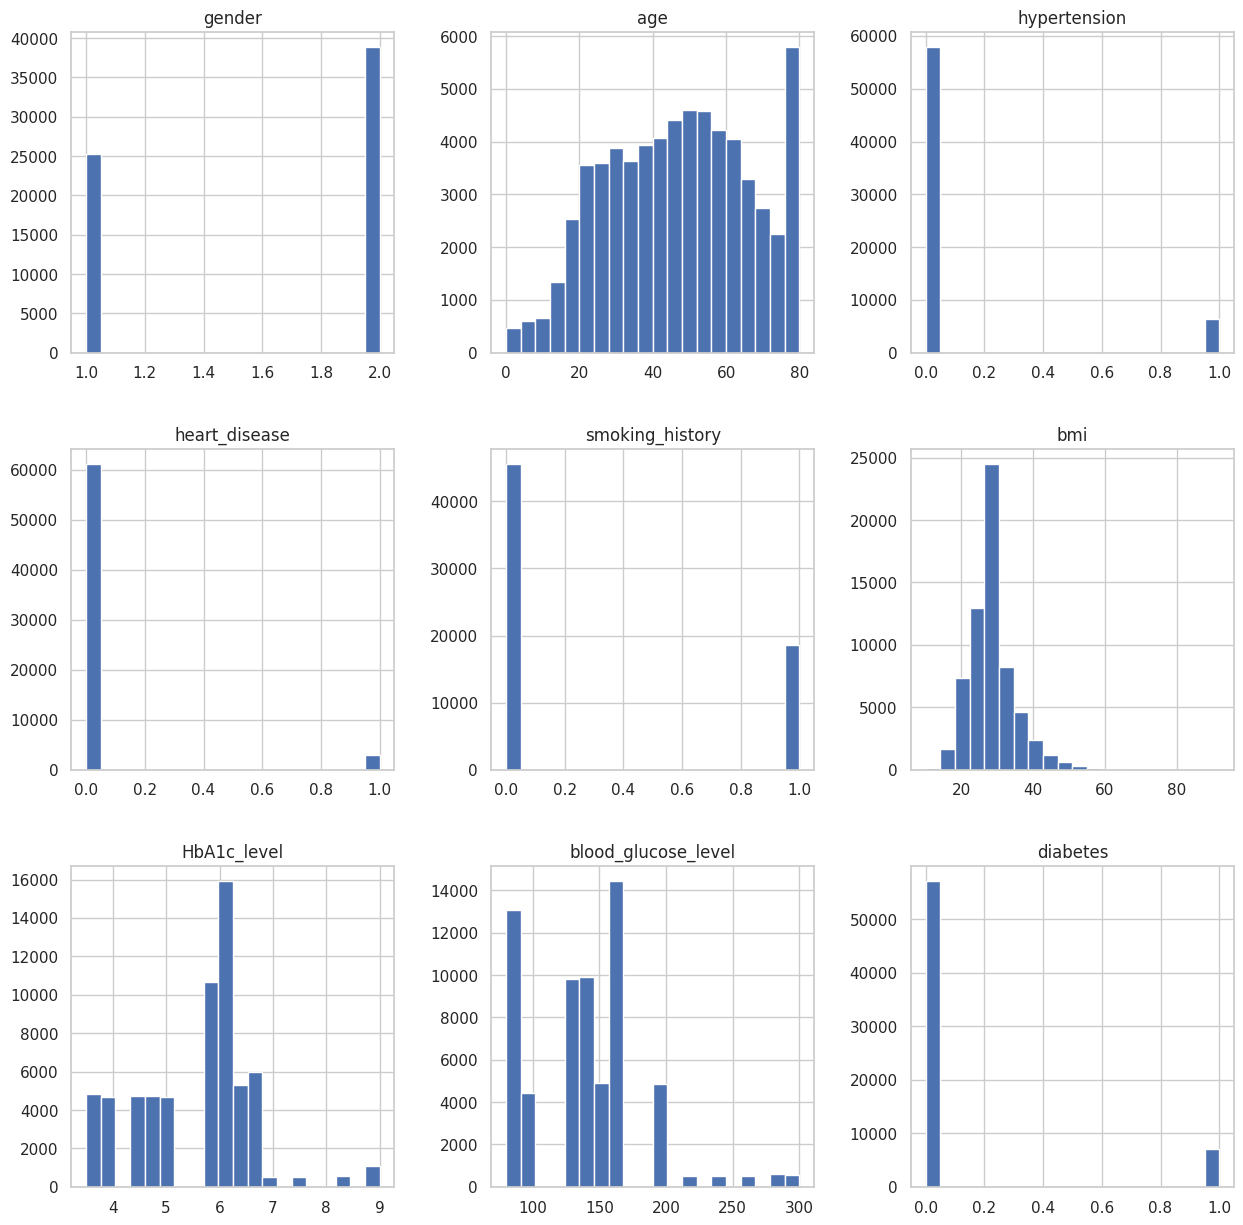

In [40]:
df.hist(bins=20, figsize=(15, 15))
plt.show()

In [41]:
corr_table = round(df[['gender','age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'smoking_history',
       'diabetes']].corr(method = 'pearson'), 2)
corr_table

,gender,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease,smoking_history,diabetes
gender,1.00,-0.02,-0.01,-0.03,-0.03,-0.03,-0.09,-0.10,-0.06
age,-0.02,1.00,0.16,0.12,0.12,0.25,0.24,0.13,0.26
bmi,-0.01,0.16,1.00,0.08,0.09,0.13,0.04,0.06,0.20
HbA1c_level,-0.03,0.12,0.08,1.00,0.19,0.09,0.07,0.02,0.44
blood_glucose_level,-0.03,0.12,0.09,0.19,1.00,0.09,0.08,0.03,0.45
hypertension,-0.03,0.25,0.13,0.09,0.09,1.00,0.12,0.04,0.19
heart_disease,-0.09,0.24,0.04,0.07,0.08,0.12,1.00,0.07,0.17
smoking_history,-0.10,0.13,0.06,0.02,0.03,0.04,0.07,1.00,0.05
diabetes,-0.06,0.26,0.20,0.44,0.45,0.19,0.17,0.05,1.00


Feature Importance (Statistical + ML approach)

**Logistic Regression**



              precision    recall  f1-score   support

           0       0.98      0.89      0.93     11435
           1       0.49      0.87      0.62      1400

    accuracy                           0.89     12835
   macro avg       0.73      0.88      0.78     12835
weighted avg       0.93      0.89      0.90     12835



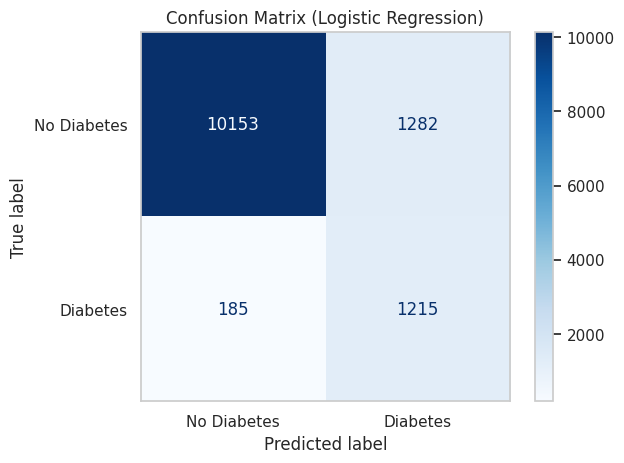

               Feature  Coefficient
2          HbA1c_level     2.382562
3  blood_glucose_level     1.335039
0                  age     0.973407
1                  bmi     0.623774
4         hypertension     0.231025
5        heart_disease     0.155078
6      smoking_history     0.052765
7               gender    -0.149988


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define features and target
X = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'smoking_history', 'gender']]
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Evaluate
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

#
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Logistic Regression)')
plt.grid(False)
plt.show()

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(importance)


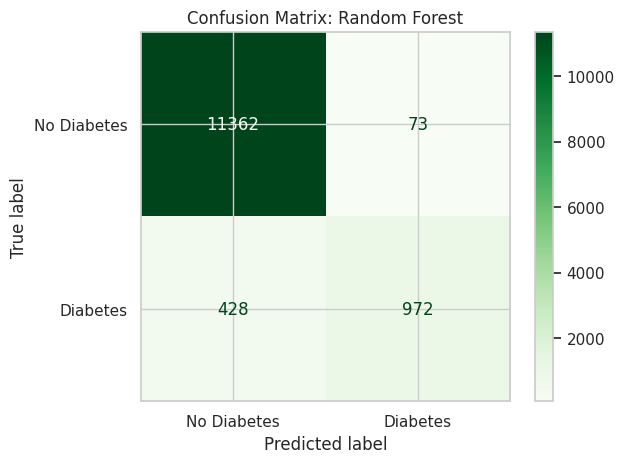

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Greens')
import matplotlib.pyplot as plt
plt.title('Confusion Matrix: Random Forest')
plt.show()

results are ok for a model with class_weight='balanced' because we rather have some false alarms and scare people than miss an actuall sick one.
we have 64172 entries so the 1282 false alarms means a precision of 98% meaning if it says you are healthy, you almost certainly are. Also from 1400 cases that actually had diabetes we caught the 1215 thats a 87% successfull prediction.

Interpretation

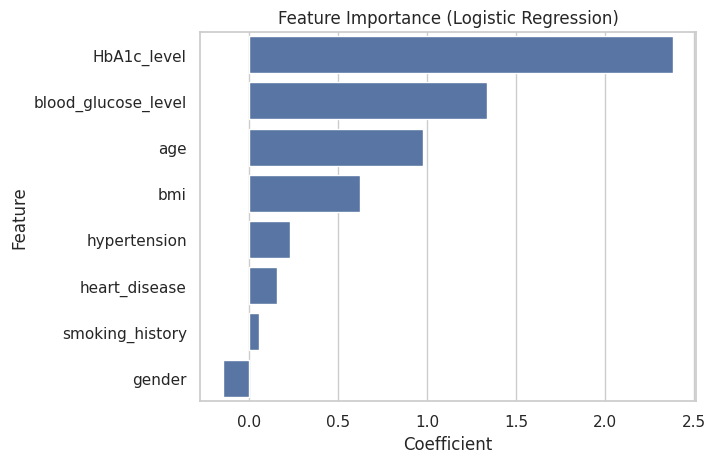

In [44]:
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title('Feature Importance (Logistic Regression)')
plt.show()


This shows which features have the strongest predictive power for diabetes.


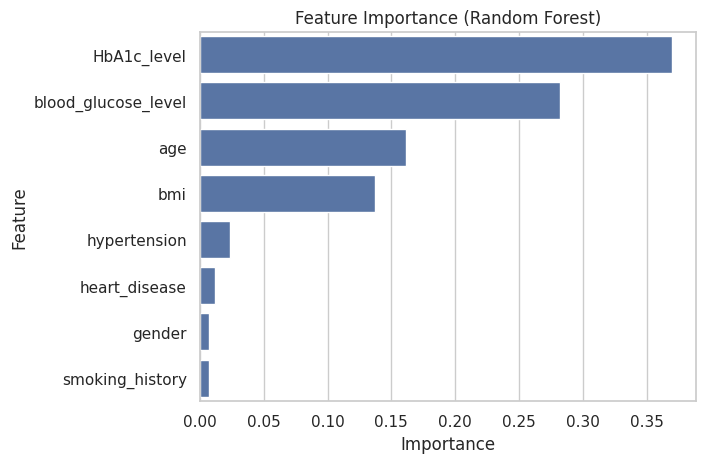

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_rf.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()


Model Validation: Cross-Validation (If the accuracy scores are consistent across all 5 runs, we can be confident the model is robust and reliable)

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.96104402 0.959291   0.96006623 0.95967663 0.95987143]
Average Accuracy: 0.9600


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best Parameters found:", grid_search.best_params_)
print("Best Accuracy during search:", grid_search.best_score_)

Best Parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy during search: 0.9604184055709921


Statistical Significance Tests

If p < 0.05, the difference between diabetic and non-diabetic groups for that feature is statistically significant.

In [48]:
from scipy.stats import ttest_ind, chi2_contingency

for col in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    group0 = df[df['diabetes']==0][col]
    group1 = df[df['diabetes']==1][col]
    stat, p = ttest_ind(group0, group1)
    print(f"{col}: p-value = {p:.4f}")


age: p-value = 0.0000
bmi: p-value = 0.0000
HbA1c_level: p-value = 0.0000
blood_glucose_level: p-value = 0.0000


Visualize relationships for diabetics vs non-diabetics:

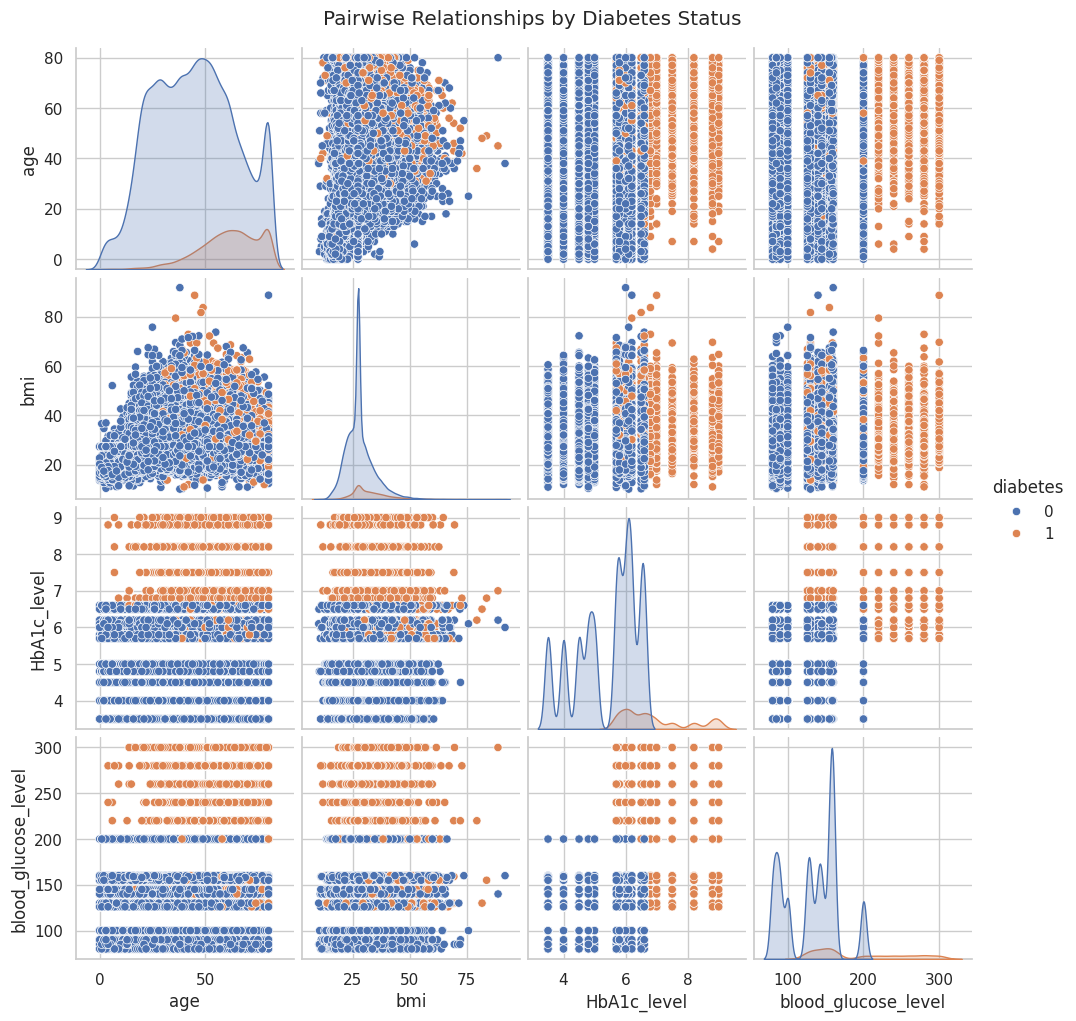

In [49]:
sns.pairplot(df, vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], hue='diabetes')
plt.suptitle('Pairwise Relationships by Diabetes Status', y=1.02)
plt.show()


**ROC Curve visualization**

The closer the curve is to the top-left corner, the better the model is at distinguishing between high-risk and low-risk individuals.(generally with a roc curve with AUC > 0.7 is considered a good model)

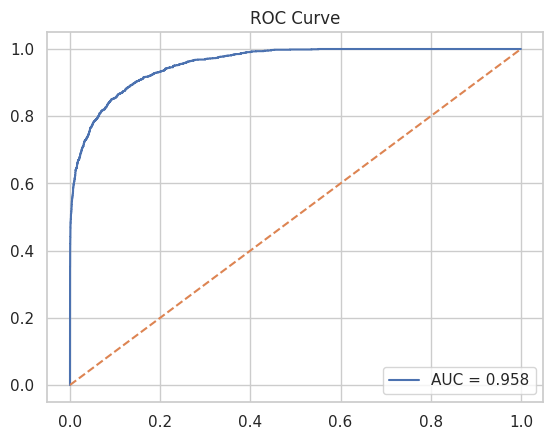

In [50]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.legend()
plt.title('ROC Curve')
plt.show()
